In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread, imsave

In [2]:
PATH_GT = "gtFine/train/aachen"
PATH_IMAGE = "leftImg8bit/train/aachen"

In [3]:
filenames_image = os.listdir(PATH_IMAGE)
filenames_image

['aachen_000000_000019_leftImg8bit.png',
 'aachen_000001_000019_leftImg8bit.png',
 'aachen_000002_000019_leftImg8bit.png',
 'aachen_000003_000019_leftImg8bit.png',
 'aachen_000004_000019_leftImg8bit.png',
 'aachen_000005_000019_leftImg8bit.png',
 'aachen_000006_000019_leftImg8bit.png',
 'aachen_000007_000019_leftImg8bit.png',
 'aachen_000008_000019_leftImg8bit.png',
 'aachen_000009_000019_leftImg8bit.png',
 'aachen_000010_000019_leftImg8bit.png',
 'aachen_000011_000019_leftImg8bit.png',
 'aachen_000012_000019_leftImg8bit.png',
 'aachen_000013_000019_leftImg8bit.png',
 'aachen_000014_000019_leftImg8bit.png',
 'aachen_000015_000019_leftImg8bit.png',
 'aachen_000016_000019_leftImg8bit.png',
 'aachen_000017_000019_leftImg8bit.png',
 'aachen_000018_000019_leftImg8bit.png',
 'aachen_000019_000019_leftImg8bit.png',
 'aachen_000020_000019_leftImg8bit.png',
 'aachen_000021_000019_leftImg8bit.png',
 'aachen_000022_000019_leftImg8bit.png',
 'aachen_000023_000019_leftImg8bit.png',
 'aachen_000024_

In [4]:
filenames_gt = os.listdir(PATH_GT)
filenames_gt

['aachen_000000_000019_gtFine_color.png',
 'aachen_000000_000019_gtFine_instanceIds.png',
 'aachen_000000_000019_gtFine_labelIds.png',
 'aachen_000000_000019_gtFine_polygons.json',
 'aachen_000001_000019_gtFine_color.png',
 'aachen_000001_000019_gtFine_instanceIds.png',
 'aachen_000001_000019_gtFine_labelIds.png',
 'aachen_000001_000019_gtFine_polygons.json',
 'aachen_000002_000019_gtFine_color.png',
 'aachen_000002_000019_gtFine_instanceIds.png',
 'aachen_000002_000019_gtFine_labelIds.png',
 'aachen_000002_000019_gtFine_polygons.json',
 'aachen_000003_000019_gtFine_color.png',
 'aachen_000003_000019_gtFine_instanceIds.png',
 'aachen_000003_000019_gtFine_labelIds.png',
 'aachen_000003_000019_gtFine_polygons.json',
 'aachen_000004_000019_gtFine_color.png',
 'aachen_000004_000019_gtFine_instanceIds.png',
 'aachen_000004_000019_gtFine_labelIds.png',
 'aachen_000004_000019_gtFine_polygons.json',
 'aachen_000005_000019_gtFine_color.png',
 'aachen_000005_000019_gtFine_instanceIds.png',
 'aac

In [5]:
ind = 1

In [126]:
image = imread(os.path.join(PATH_IMAGE, filenames_image[ind]))
gt_color = imread(os.path.join(PATH_GT, filenames_gt[4 * ind + 0]))
gt_instanceIds = imread(os.path.join(PATH_GT, filenames_gt[4 * ind + 1]))
gt_labelIds = imread(os.path.join(PATH_GT, filenames_gt[4 * ind + 2]))

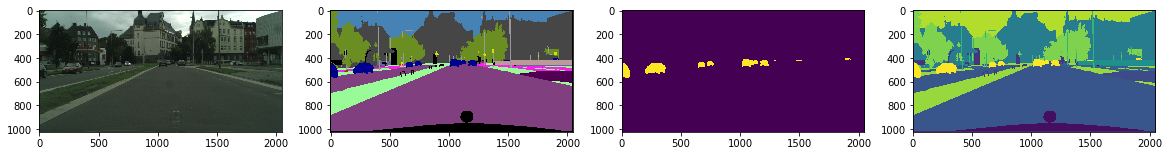

In [127]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 4, 1)
plt.imshow(image)
plt.subplot(1, 4, 2)
plt.imshow(gt_color)
plt.subplot(1, 4, 3)
plt.imshow(gt_instanceIds)
plt.subplot(1, 4, 4)
plt.imshow(gt_labelIds)
plt.show()

In [128]:
image.shape, gt_color.shape, gt_instanceIds.shape, gt_labelIds.shape

((1024, 2048, 3), (1024, 2048, 4), (1024, 2048), (1024, 2048))

In [129]:
num_class = 19

In [130]:
void_classes = [0, 1, 2, 3, 4, 5, 6, 9, 10, 14, 15, 16, 18, 29, 30, -1]
valid_classes = [7, 8, 11, 12, 13, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33]
class_names = ['unlabelled', 'road', 'sidewalk', 'building', 'wall', 'fence',
                    'pole', 'traffic_light', 'traffic_sign', 'vegetation', 'terrain',
                    'sky', 'person', 'rider', 'car', 'truck', 'bus', 'train',
                    'motorcycle', 'bicycle']

ignore_index = 255
class_map = dict(zip(valid_classes, range(num_class)))
        
        
def encode_segmap(mask):
    # Put all void classes to zero
    for _voidc in void_classes:
        mask[mask == _voidc] = ignore_index
    for _validc in valid_classes:
        mask[mask == _validc] = class_map[_validc]
    return mask

In [131]:
gt_image = encode_segmap(gt_labelIds)
pre_image = gt_image.copy()

In [132]:
pre_image[100:200, 800:1000] = 11

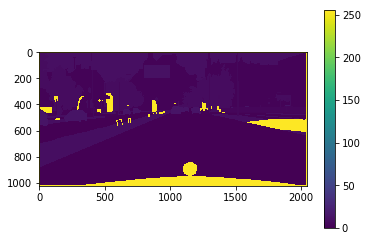

In [133]:
plt.imshow(pre_image)
plt.colorbar()
plt.show()

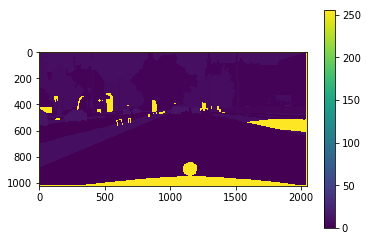

In [134]:
plt.imshow(gt_image)
plt.colorbar()
plt.show()

In [135]:
np.unique(gt_image)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  13, 255],
      dtype=uint8)

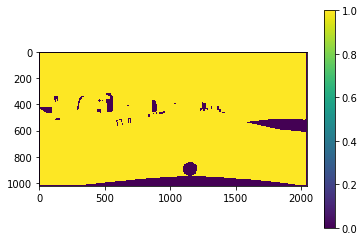

In [136]:
mask = (gt_image >= 0) & (gt_image < num_class)
plt.imshow(mask.astype(int))
plt.colorbar()
plt.show()

In [137]:
label = num_class * gt_image[mask].astype('int') + pre_image[mask]

In [138]:
count = np.bincount(label, minlength=num_class**2)

In [139]:
confusion_matrix = count.reshape(num_class, num_class)

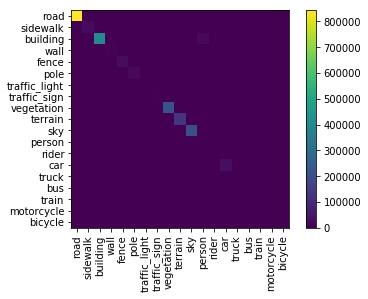

In [140]:
plt.imshow(confusion_matrix)
ticks = range(0, len(valid_classes))
labels = [class_names[i + 1] for i in ticks]
plt.xticks(ticks=ticks, labels=labels, rotation=90)
plt.yticks(ticks=ticks, labels=labels)
plt.colorbar()
plt.show()

In [141]:
Acc = np.diag(confusion_matrix) / confusion_matrix.sum(axis=1)

C:\Users\Oganes\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [142]:
class_performances = list(zip(class_names[1: ], Acc))

In [143]:
class_performances

[('road', 1.0),
 ('sidewalk', 1.0),
 ('building', 0.9529662980008325),
 ('wall', 1.0),
 ('fence', 1.0),
 ('pole', 1.0),
 ('traffic_light', 1.0),
 ('traffic_sign', 1.0),
 ('vegetation', 1.0),
 ('terrain', 1.0),
 ('sky', 1.0),
 ('person', nan),
 ('rider', nan),
 ('car', 1.0),
 ('truck', nan),
 ('bus', nan),
 ('train', nan),
 ('motorcycle', nan),
 ('bicycle', nan)]